In [4]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import sys 
import os
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt 
import numpy as np
import cv2
model = load_model('model/08-0.0293.keras')
#model = load_model('/content/model_cnn/15-0.0595.hdf5')#colab₫ 79
model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

In [5]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# input_shape=(행, 열, 색상 또는 흑백) 형식. 입력 이미지가 색상이면 3, 흑백이면 1 #즉 CNN을 쓰기 전에는 1차원 배열로 만들어 주었지만 CNN에서는 image 정보를 그대로 살림
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1). astype('float32') / 255

In [7]:
wrong_list = []
pred_result = model.predict(X_test)
pred_label = np.argmax(pred_result, axis=1)
for n in range(len(Y_test)):
    if pred_label[n] != Y_test[n]:
        wrong_list.append (n)
len(wrong_list)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


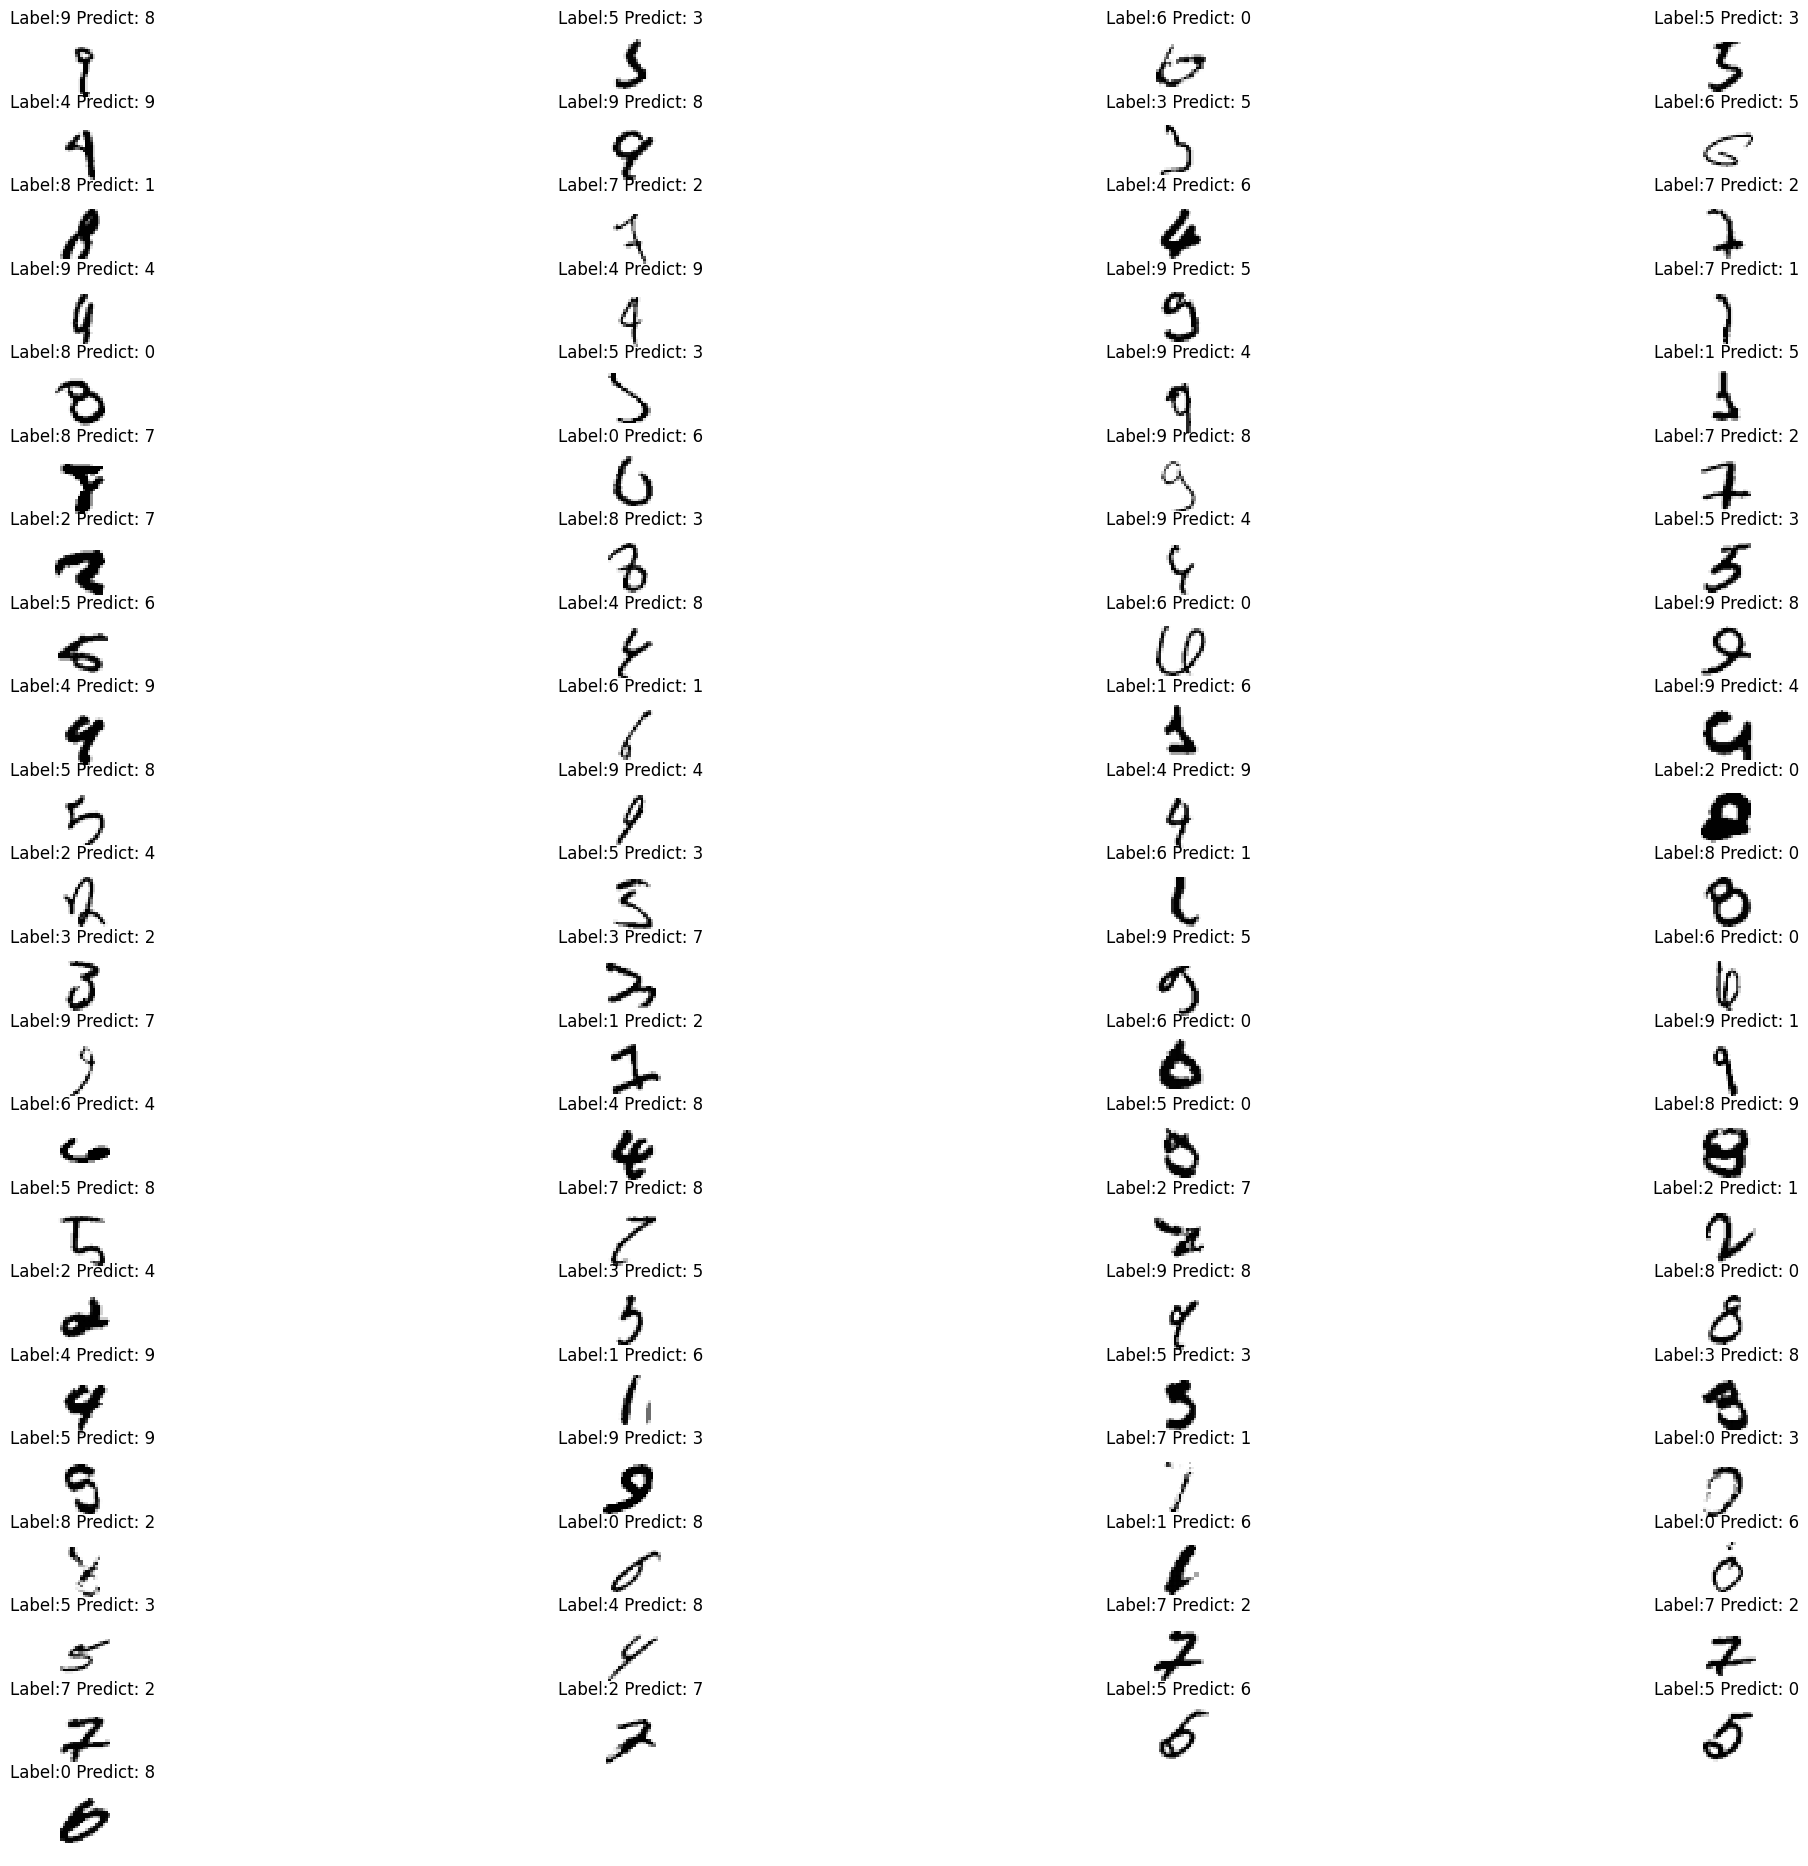

In [12]:
plt. figure(figsize=(14, 12))
for idx, n in enumerate(wrong_list) :
    # wrong_result 이 결과를 모두 표시해야 함
    # 한줄에 4개를 표시 하므로 마지막에 0에서 4개가 남음 이거에 대비해서 한줄을 더 만들어 줌
    plt.subplot(len(wrong_list)//4+1, 4, idx+ 1) #결과가 정수로 나와야 하므로 몫 연산자로 정수만 취함
    plt.subplots_adjust(left=0.0, bottom=0.0,
    right=1.5, top=1.52)
    plt. imshow(X_test[n].reshape(28, 28), cmap= 'Greys'
    , interpolation='nearest')
    plt. title( 'Label:' + str(Y_test[n]) + ' Predict: ' + str(pred_label[n]))
    plt.axis('off')
plt. show()